# EDA – Case Study

The given dataset consists of data related to ride-sharing service costs, encompassing various factors that could influence the dynamic pricing model of rides. It includes 1,000 records with the following key attributes:

- **Number_of_Riders**: The number of riders participating in the ride.
- **Number_of_Drivers**: The number of drivers available at the time of booking.
- **Location_Category**: The category of the location (Urban, Suburban, Rural).
- **Customer_Loyalty_Status**: The loyalty status of the customer (e.g., Silver, Regular).
- **Number_of_Past_Rides**: The number of past rides the customer has had.
- **Average_Ratings**: The average ratings given to the drivers by the customer.
- **Time_of_Booking**: The time of the day when the booking was made.
- **Vehicle_Type**: The type of vehicle booked for the ride.
- **Expected_Ride_Duration**: The expected duration of the ride in minutes.
- **Historical_Cost_of_Ride**: The cost of the ride, which serves as the target variable for predictive modeling.

## Task

Your task is to conduct an Exploratory Data Analysis (EDA) to identify and select the most important features for predicting the **Historical_Cost_of_Ride**.

### Steps

1. **Start the EDA by importing the necessary Python libraries**  
   - Import libraries such as `pandas`, `numpy`, `matplotlib`, and `seaborn`.

2. **Perform a data quality check**  
   - Identify any missing values or incorrect data types.

3. **Analyze the distribution of numerical features**  
   - Understand the distribution of numerical features.
   - Plot the distributions for numerical features.

4. **Explore the categorical features**  
   - Understand the distribution of categorical features.
   - Plot the counts of each category for the categorical features.

5. **Give Analysis Summary for Categorical and Numerical Features**  
   - Provide a summary of observations for both types of features.

6. **Perform Bivariate Analysis**  
   - Explore the relationships between the target variable (**Historical_Cost_of_Ride**) and other features:
     - Use scatter plots of numerical features against **Historical_Cost_of_Ride**.
     - Use box plots to examine the variance in ride costs across different categories.

7. **Provide a Summary of Insights for Feature Selection**  
   - Summarize the key insights gathered from the EDA.
   - List the features identified as potentially important for predicting ride costs.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [4]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [5]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

3. **Analyze the distribution of numerical features**  
For numerical features in Exploratory Data Analysis (EDA), the following types of graphs are commonly used to visualize data distributions and relationships.

3.1 Histograms:
- Used to visualize the distribution of a single numerical variable.
- Helps to understand the shape (e.g., skewness) of the data.



<Axes: xlabel='Number_of_Drivers', ylabel='Count'>

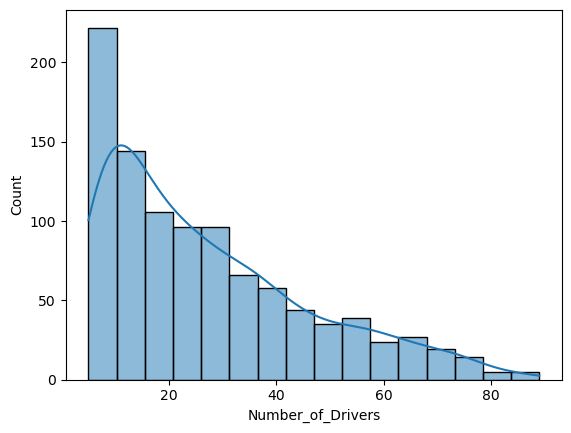

In [6]:
sns.histplot(df['Number_of_Drivers'], kde=True)

3.2 Boxplots:
- Used to detect outliers and visualize the distribution spread.



<Axes: xlabel='Number_of_Past_Rides'>

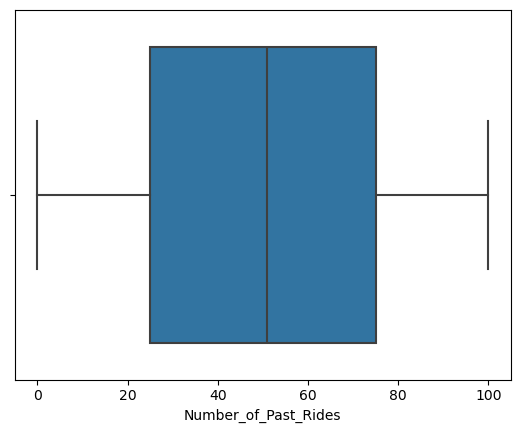

In [7]:
sns.boxplot(x=df['Number_of_Past_Rides'])

3.3 Density Plots:
- Similar to histograms but show a smooth distribution.


<Axes: xlabel='Historical_Cost_of_Ride', ylabel='Density'>

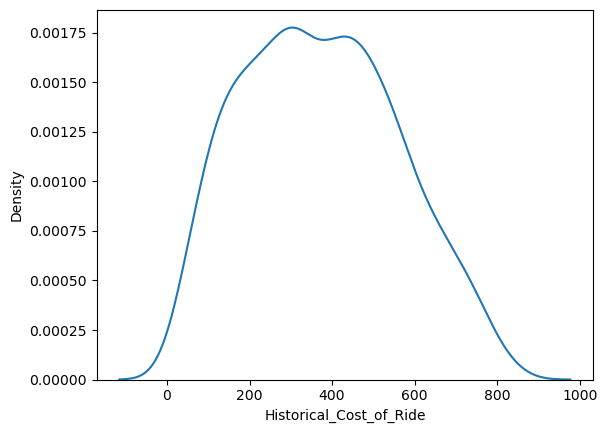

In [8]:
sns.kdeplot(x=df['Historical_Cost_of_Ride'])

3.4 Scatter Plots:
- Used to visualize relationships between two numerical features.


<Axes: xlabel='Expected_Ride_Duration', ylabel='Historical_Cost_of_Ride'>

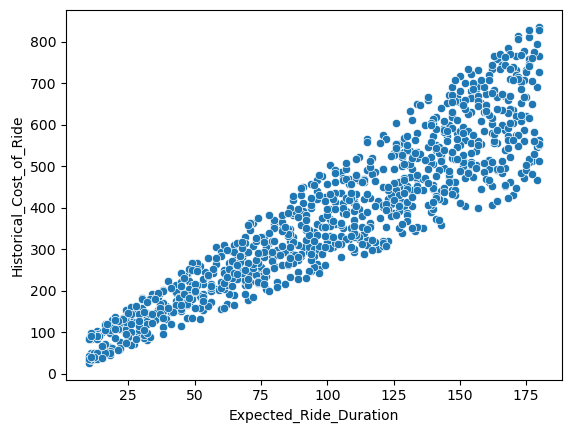

In [9]:
sns.scatterplot(y=df['Historical_Cost_of_Ride'],x=df['Expected_Ride_Duration'],data=df)

3.5 Pair Plots:
- Used to visualize pairwise relationships between all numerical features.


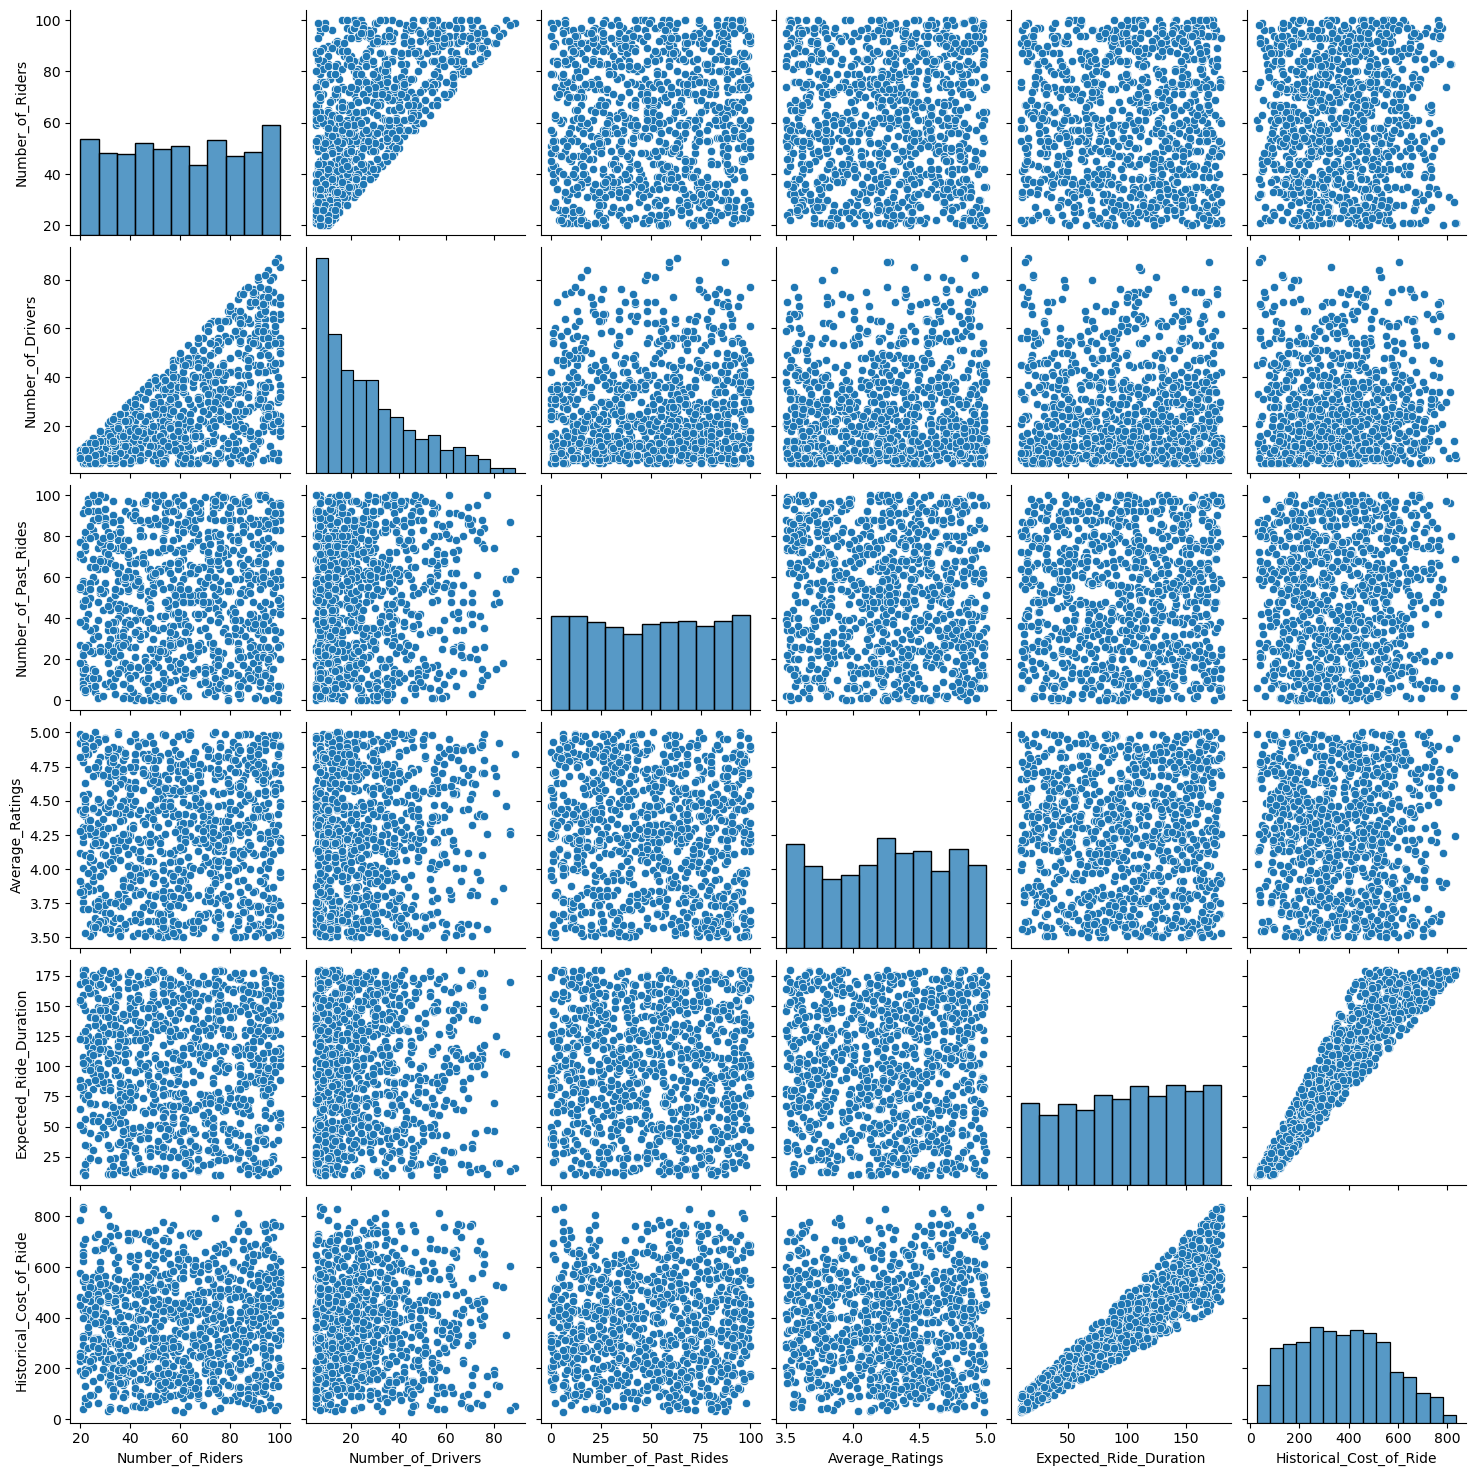

In [10]:
sns.pairplot(df)

3.6 Violin Plots:
- Combines boxplot and KDE to show distribution and outliers.

<Axes: xlabel='Number_of_Drivers'>

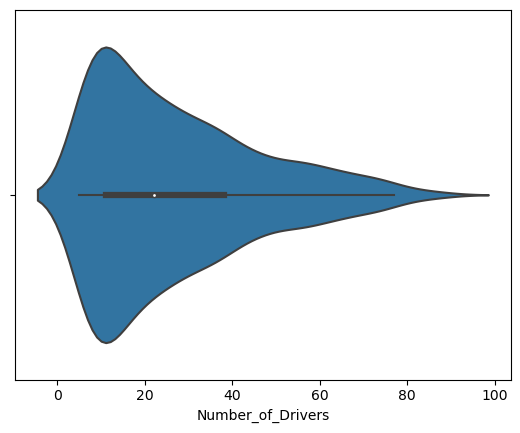

In [11]:
sns.violinplot(x=df['Number_of_Drivers'])

4. **Explore the categorical features**  
For categorical features, the following types of graphs are commonly used to visualize distributions and relationships in EDA.

In [12]:
df.describe(include='object')

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


4.1 Bar Plots:
- Used to show the count or proportion of each category.
- Helps to understand the distribution of a single categorical feature.

<Axes: xlabel='Location_Category', ylabel='count'>

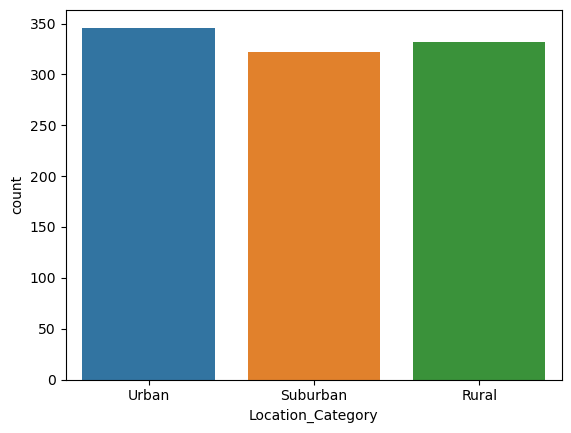

In [13]:
sns.countplot(x=df['Location_Category'])

4.2 Pie Charts:
- Used to represent the proportion of categories as slices of a pie.
- Best for visualizing simple distributions with a few categories.

<Axes: ylabel='count'>

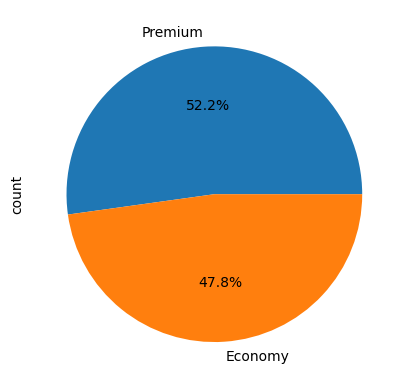

In [14]:
df['Vehicle_Type'].value_counts().plot.pie(autopct='%1.1f%%')


4.3 Stacked Bar Plots:
- Used to show relationships between two categorical features.

<Axes: xlabel='Location_Category'>

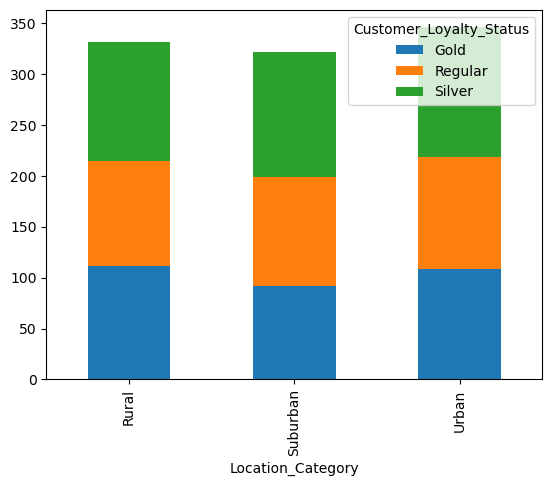

In [15]:
pd.crosstab(df['Location_Category'],df['Customer_Loyalty_Status']).plot(kind='bar',stacked=True)

4.4 Boxplots (With Categorical Features on X-axis):
- Used to compare numerical data distributions across categories of a categorical feature.

<Axes: xlabel='Vehicle_Type', ylabel='Historical_Cost_of_Ride'>

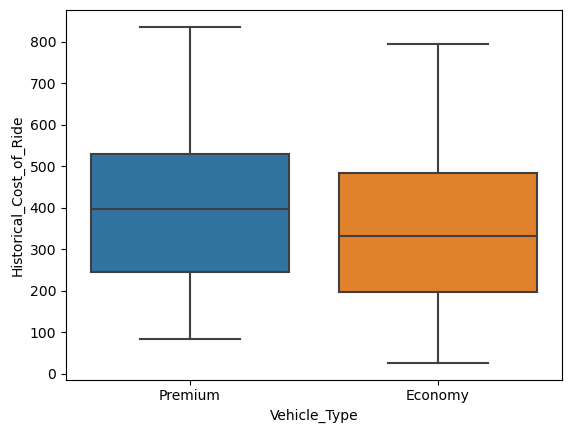

In [16]:
sns.boxplot(x='Vehicle_Type',y='Historical_Cost_of_Ride',data=df)

4.5 Violin Plots:
- Similar to boxplots but include KDE to show the distribution for each category.

<Axes: xlabel='Vehicle_Type', ylabel='Historical_Cost_of_Ride'>

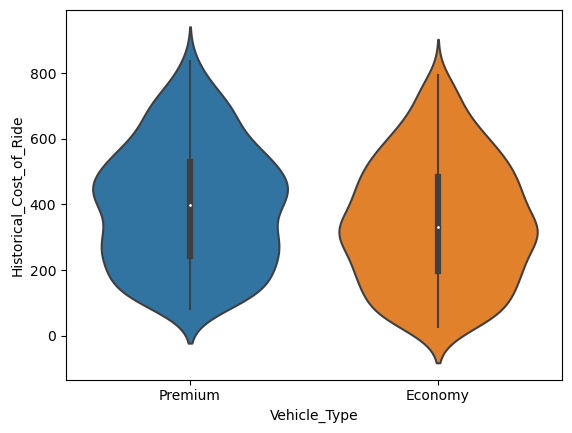

In [17]:
sns.violinplot(x='Vehicle_Type',y='Historical_Cost_of_Ride',data=df)


4.6 Point Plots:
- Shows the mean (or other summary statistic) of a numerical feature for each category.

<Axes: xlabel='Vehicle_Type', ylabel='Historical_Cost_of_Ride'>

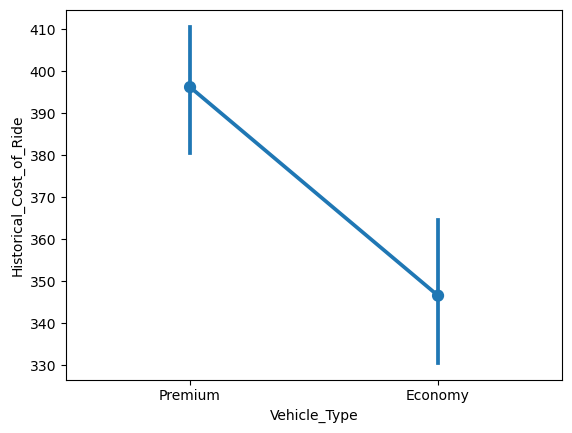

In [18]:
sns.pointplot(x='Vehicle_Type',y='Historical_Cost_of_Ride',data=df)

4.7 Strip Plots:
- Displays individual data points for each category of a categorical feature, often alongside boxplots or violin plots.

<Axes: xlabel='Vehicle_Type', ylabel='Historical_Cost_of_Ride'>

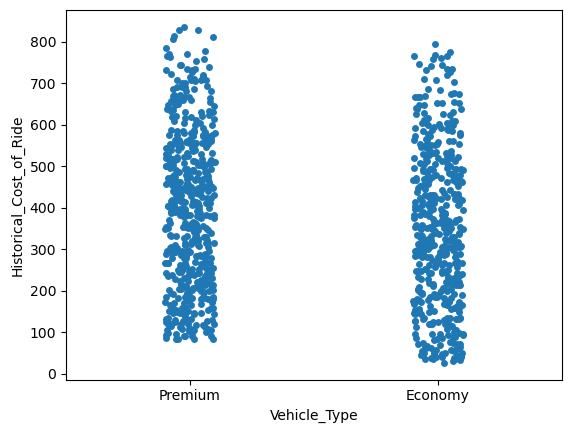

In [19]:
sns.stripplot(x='Vehicle_Type',y='Historical_Cost_of_Ride',data=df)


For univariate analysis (one categorical feature):
 - Use bar plots or pie charts.  
For bivariate analysis (categorical + numerical):
 - Use boxplots, violin plots, or strip plots.  
For bivariate analysis (categorical + categorical):
 - Use stacked bar plots or heatmaps.


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


5. **Analysis Summary for Categorical and Numerical Features**  


5.1 Identify the Types of Features\
**Categorical Features:**\
Vehicle_Type, Time_of_Booking, Customer_Loyalty_Status, Location_Category\
**Numerical Features:**\
 Number_of_Riders, Number_of_Drivers, Number_of_Past_Rides, Average_Ratings, Expected_Ride_Duration, Historical_Cost_of_Ride


In [21]:
df.describe(include='object')

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


5.2 For Categorical Features:
- Count the occurrences of each category.

In [22]:
print(df['Location_Category'].value_counts())
print("------------------------------------------------")
print(df['Location_Category'].value_counts(normalize=True)*100)

Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64
------------------------------------------------
Location_Category
Urban       34.6
Rural       33.2
Suburban    32.2
Name: proportion, dtype: float64


In [23]:
print(df['Customer_Loyalty_Status'].value_counts())
print("------------------------------------------------")
print(df['Customer_Loyalty_Status'].value_counts(normalize=True)*100)

Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64
------------------------------------------------
Customer_Loyalty_Status
Silver     36.7
Regular    32.0
Gold       31.3
Name: proportion, dtype: float64


In [24]:
print(df['Time_of_Booking'].value_counts())
print("------------------------------------------------")
print(df['Time_of_Booking'].value_counts(normalize=True)*100)

Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64
------------------------------------------------
Time_of_Booking
Night        27.6
Afternoon    24.7
Morning      24.6
Evening      23.1
Name: proportion, dtype: float64


In [25]:
print(df['Vehicle_Type'].value_counts())
print("------------------------------------------------")
print(df['Vehicle_Type'].value_counts(normalize=True)*100)

Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64
------------------------------------------------
Vehicle_Type
Premium    52.2
Economy    47.8
Name: proportion, dtype: float64


5.3 For Numerical Features:
- Calculate descriptive statistics (mean, median, mode, standard deviation, min, max).
- Identify patterns or outliers.

In [26]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


<Axes: xlabel='Historical_Cost_of_Ride'>

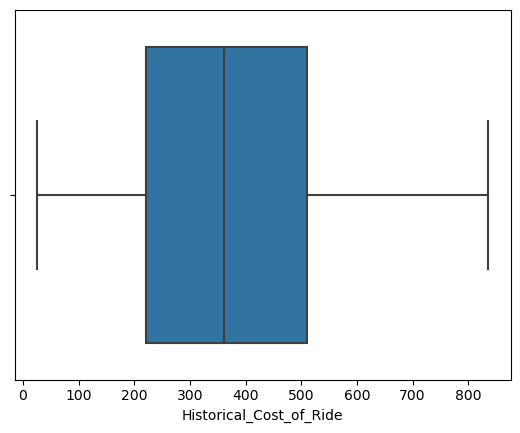

In [27]:
# Detecting outliers with boxplot
sns.boxplot(x=df['Historical_Cost_of_Ride'])


In [28]:
Q1 = df['Historical_Cost_of_Ride'].quantile(0.25)
Q3 = df['Historical_Cost_of_Ride'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Historical_Cost_of_Ride'] < Q1 - 1.5 * IQR) | (df['Historical_Cost_of_Ride'] > Q3 + 1.5 * IQR)]

print("Number of outliers:", len(outliers))


Number of outliers: 0


There is no outlier in the feature that is why, it is not showing any.

5.4 Combine and Visualize:
- Present the summaries in tables, charts, or graphs to make observations clearer.
- Provide insights or trends you find in the data.

6. **Perform Bivariate Analysis**

In [45]:
numerical_features=df[['Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration']]

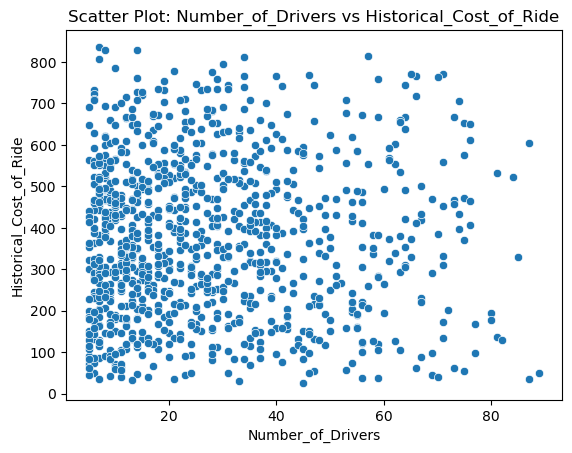

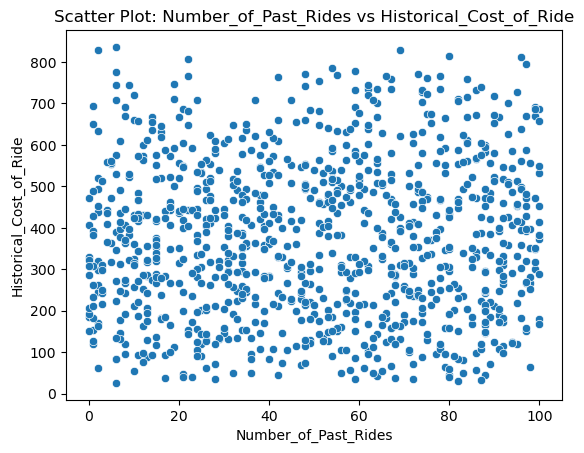

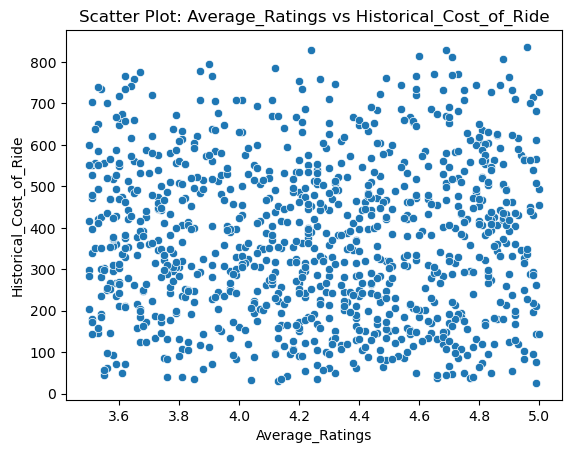

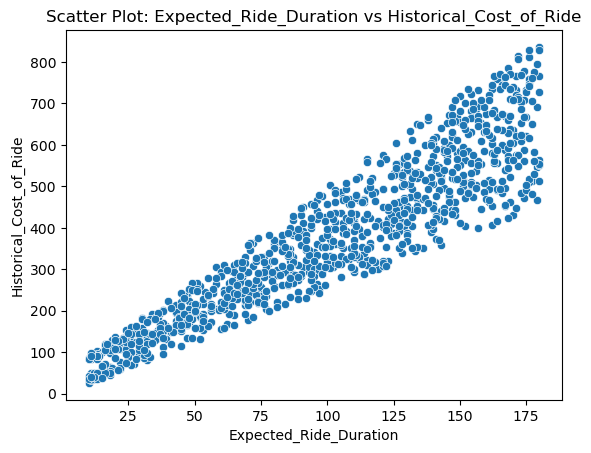

In [46]:
for col in numerical_features:  # Replace with your list of numerical features
    sns.scatterplot(data=df, x=col, y='Historical_Cost_of_Ride')
    plt.title(f'Scatter Plot: {col} vs Historical_Cost_of_Ride')
    plt.show()

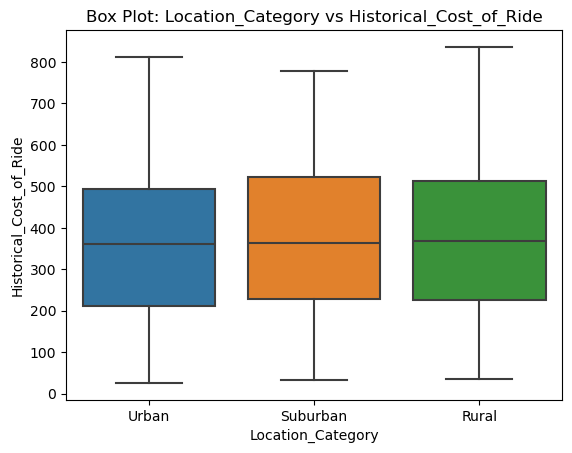

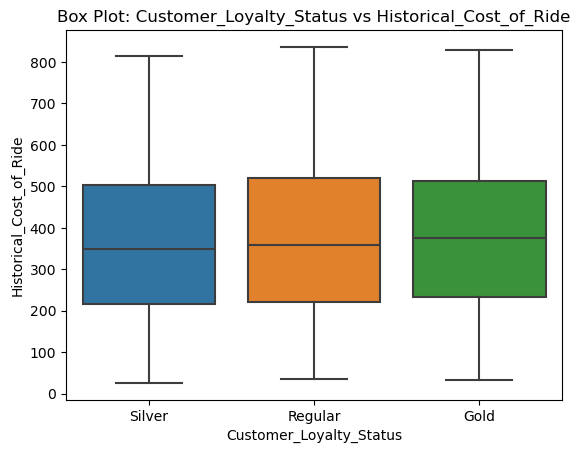

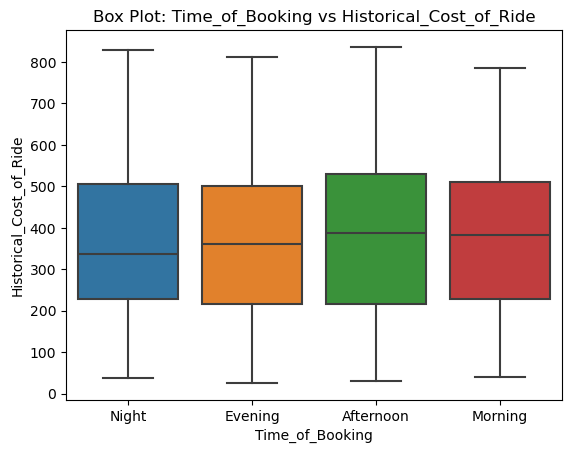

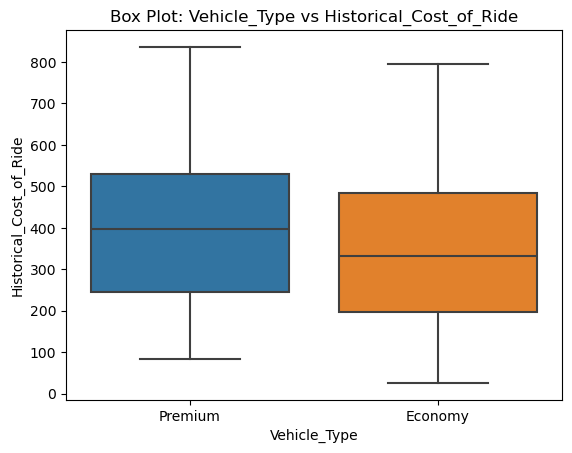

In [48]:
categorical_features=df[['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type']]
for col in categorical_features:
    sns.boxplot(data=df,x=col,y='Historical_Cost_of_Ride')
    plt.title(f'Box Plot: {col} vs Historical_Cost_of_Ride')
    plt.show()
    

That's the end of this assignement, only the seventh point or summary is missing. 